In [1]:
#Importing modules, tools, etc.
import pandas as pd



In [2]:
#importing main dataframe as df
df = pd.read_csv('data/kc_house_data.csv') 

In [3]:
#Converting grade column to an int value

#Create a dummy list
grade_num = []

#Go through each row, grabbing the first index off the string, conver to int
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

#drop the old column and add the new
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


In [4]:
# Turning NaNs in the waterfront data into NO's, then converting waterfront to binary.
# 0 is a waterfront no, 1 is a waterfront yes
#

df.waterfront.fillna(value='NO', inplace = True)
df.waterfront.replace( to_replace = ['NO','YES'], value =  [0,1], inplace = True)

12764    13540
7245     12050
3910     10040
9245      9890
8085      9640
         ...  
11488      420
8614       410
21316      390
860        380
15367      370
Name: sqft_living, Length: 21597, dtype: int64
4980.0


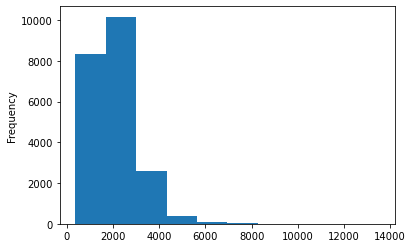

In [5]:
print(df['sqft_living'].sort_values(ascending = False))
#Those are some big results.
print(df['sqft_living'].quantile(0.99))
# even the 99 percentile is still sub 5000. 
df['sqft_living'].plot(kind = 'hist')
#Plotting this shows a bit skew right.


#It may be wise to shave the model off around there.

1717     1651359
17305    1164794
7640     1074218
7762     1024068
3945      982998
          ...   
20588        635
3449         609
7582         600
5821         572
15729        520
Name: sqft_lot, Length: 21597, dtype: int64


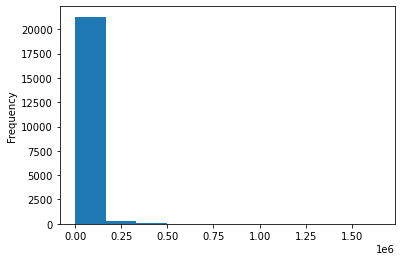

In [7]:
print(df['sqft_lot'].sort_values(ascending = False)) 
#Holy cow! I don't think those are residential sales.
print(df['sqft_lot'].quantile(0.99))
#99th quantile, still high, still well below those outliers

df['sqft_lot'].plot(kind = 'hist')
#Some weirdness at the far end

In [ ]:
df['floors'].value_counts()
#Seems reasonable. Maybe make it categorical?


<AxesSubplot:ylabel='Frequency'>

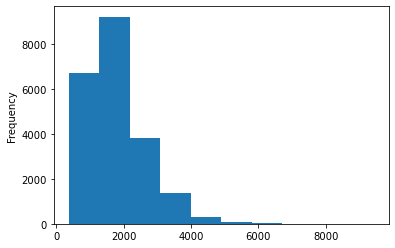

In [8]:
df['sqft_above'].sort_values(ascending = False) 
df['sqft_above'].quantile(.99)
#Not quite as extreme as sqft_livable


df['sqft_above'].plot(kind='hist')